In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv("airQualityIndia.csv")
df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  36192 non-null  object 
 1   Year       36192 non-null  int64  
 2   Month      36192 non-null  int64  
 3   Day        36192 non-null  int64  
 4   Hour       36192 non-null  int64  
 5   PM2.5      36192 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ MB


Timestamp    0
Year         0
Month        0
Day          0
Hour         0
PM2.5        0
dtype: int64

In [17]:
df.columns


Index(['Timestamp', 'Year', 'Month', 'Day', 'Hour', 'PM2.5'], dtype='object')

In [19]:
# Convert 'Timestamp' to datetime (just in case)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Drop rows where PM2.5 is missing
df = df.dropna(subset=['PM2.5'])

# Create features and target
X = df[['Year', 'Month', 'Day', 'Hour']]
y = df['PM2.5']

# Show the first few feature rows
X.head()


,Year,Month,Day,Hour
0,2017,11,7,12
1,2017,11,7,13
2,2017,11,7,14
3,2017,11,7,15
4,2017,11,7,16


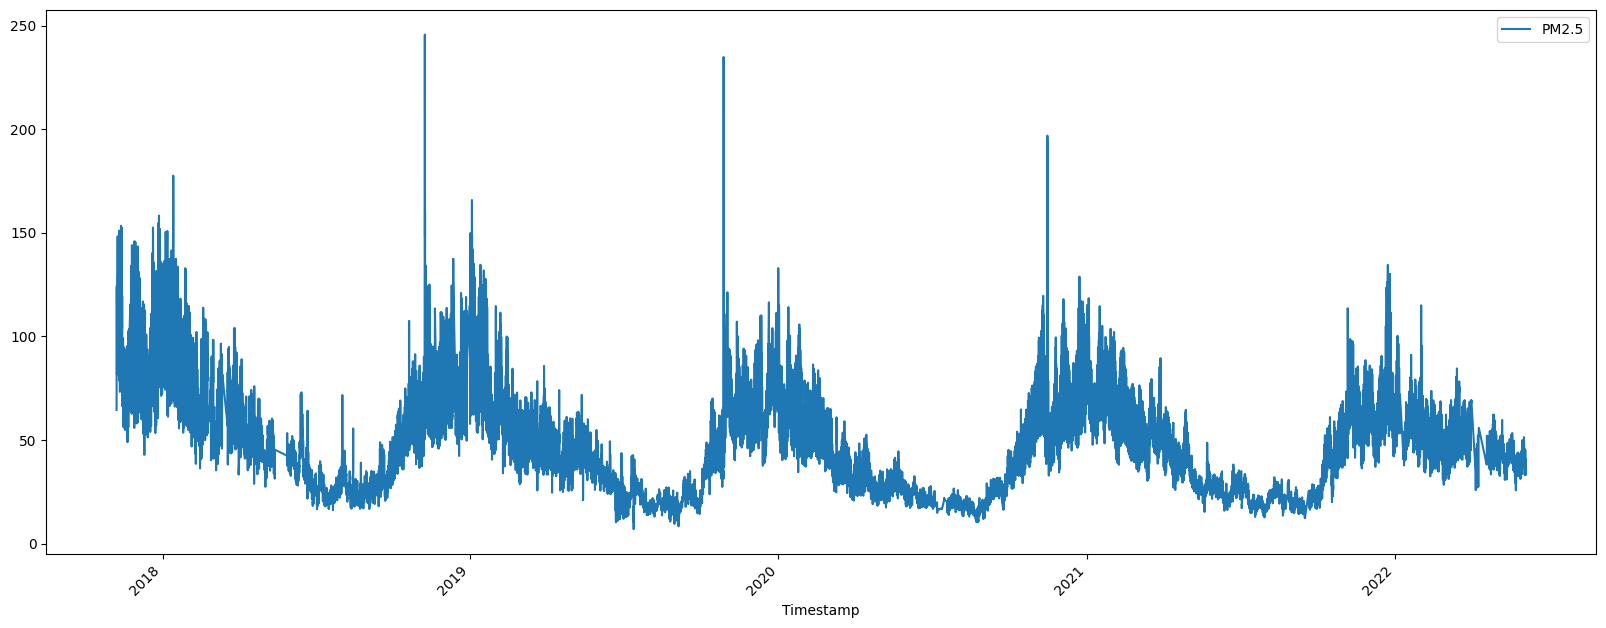

In [26]:
#Time series by days
df.plot(x='Timestamp',y='PM2.5',figsize=(20,8))
plt.xticks(rotation=45)

plt.show()

<Axes: xlabel='Year'>

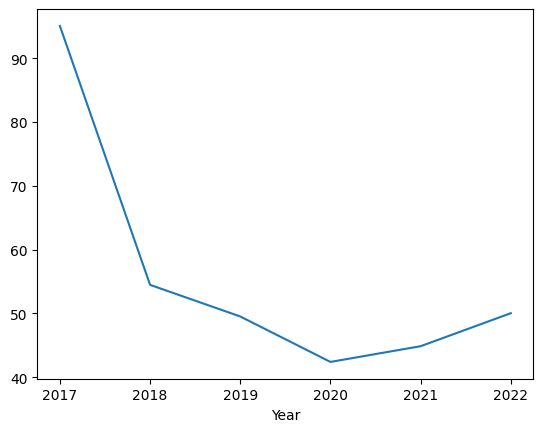

In [27]:
#Time series by year average
df.groupby('Year')['PM2.5'].mean().plot()

<Axes: xlabel='Year', ylabel='PM2.5'>

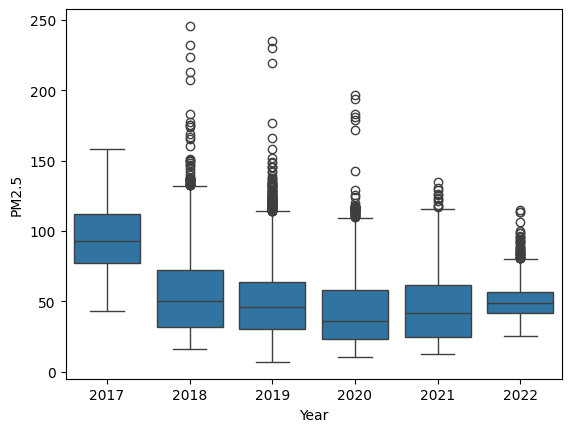

In [28]:
#Boxplot by year
df_year=df.loc[:,['Year','PM2.5']]
sns.boxplot(x='Year', y='PM2.5',data=df_year)

<Axes: xlabel='Month'>

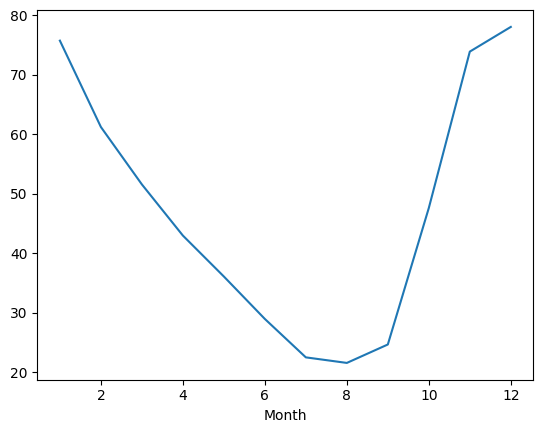

In [29]:
#Time series by month average
df.groupby('Month')['PM2.5'].mean().plot()

<Axes: xlabel='Month', ylabel='PM2.5'>

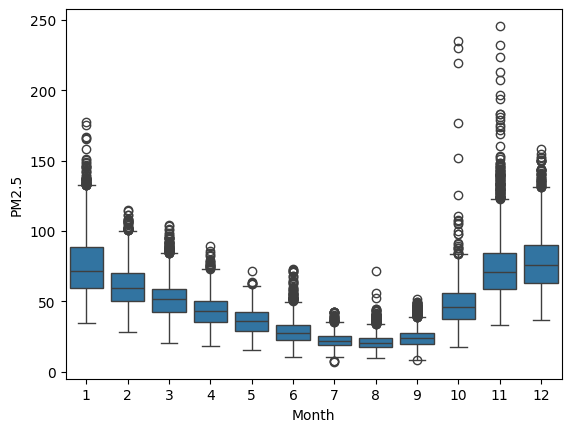

In [30]:
#Boxplot by month
df_month=df.loc[:,['Month','PM2.5']]
sns.boxplot(x='Month', y='PM2.5',data=df_month)

<Axes: xlabel='Day'>

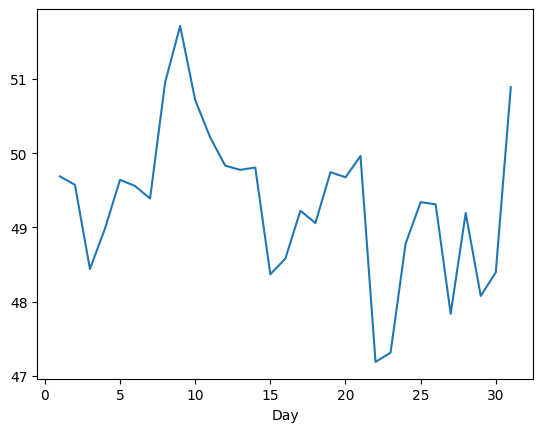

In [31]:
#Time series by day average
df.groupby('Day')['PM2.5'].mean().plot()

<Axes: xlabel='Day', ylabel='PM2.5'>

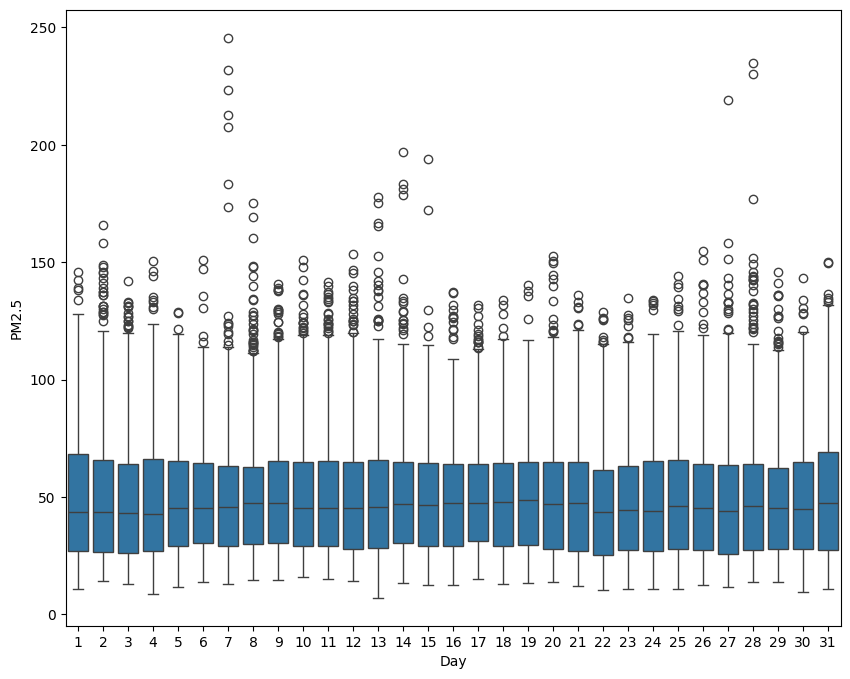

In [32]:
#Boxplot by day
df_day=df.loc[:,['Day','PM2.5']]
plt.figure(figsize=(10,8))
sns.boxplot(x='Day', y='PM2.5',data=df_day)

<Axes: xlabel='Hour'>

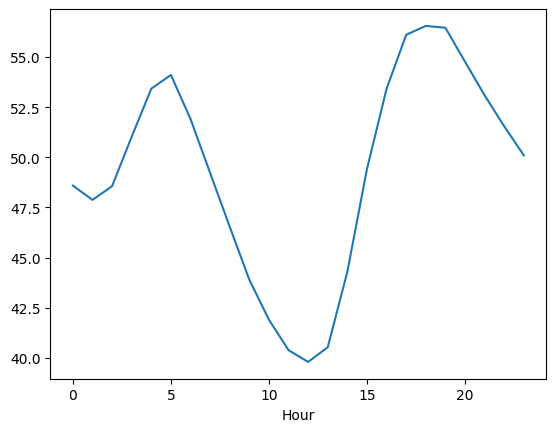

In [33]:
#Time series by hour average
df.groupby('Hour')['PM2.5'].mean().plot()

<Axes: xlabel='Hour', ylabel='PM2.5'>

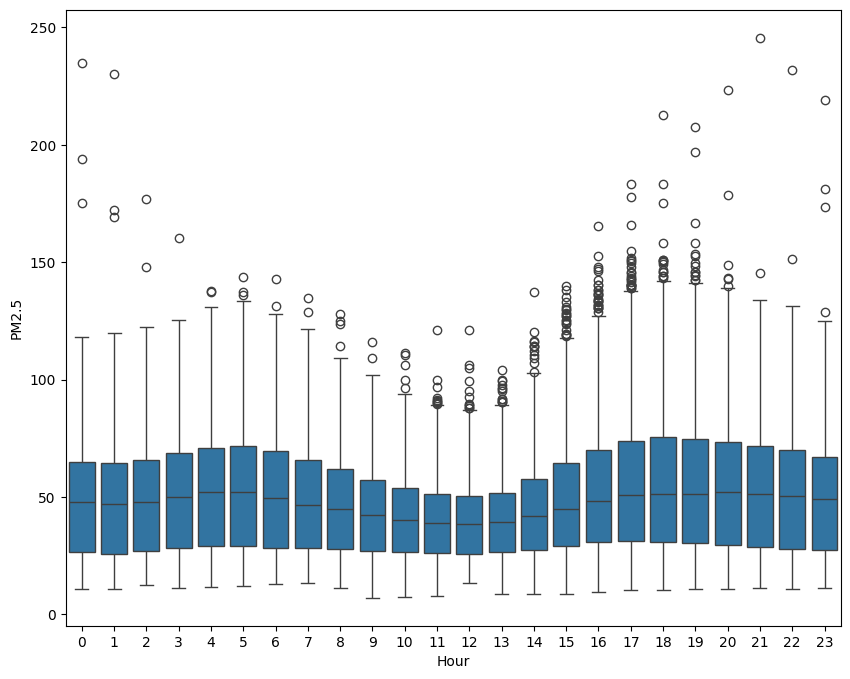

In [34]:
#Boxplot by hour
df_hour=df.loc[:,['Hour','PM2.5']]
plt.figure(figsize=(10,8))
sns.boxplot(x='Hour', y='PM2.5',data=df_hour)

In [18]:
# Check for missing values
print("Missing values in each column:\n")
print(df.isnull().sum())

# Quick statistical summary
print("\nStatistical summary:")
print(df.describe())


Missing values in each column:

Timestamp    0
Year         0
Month        0
Day          0
Hour         0
PM2.5        0
dtype: int64

Statistical summary:
               Year         Month           Day          Hour         PM2.5
count  36192.000000  36192.000000  36192.000000  36192.000000  36192.000000
mean    2019.682278      6.331841     15.716401     11.477840     49.308429
std        1.345011      3.593321      8.859769      6.925088     24.863511
min     2017.000000      1.000000      1.000000      0.000000      7.020000
25%     2019.000000      3.000000      8.000000      5.000000     28.080000
50%     2020.000000      6.000000     16.000000     11.000000     45.730000
75%     2021.000000     10.000000     23.000000     17.000000     64.520000
max     2022.000000     12.000000     31.000000     23.000000    245.630000


In [20]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_preds = rf.predict(X_test_scaled)


In [22]:
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("MSE :", mean_squared_error(y_true, y_pred))
    print("R²  :", r2_score(y_true, y_pred))
    print()

# Evaluate both models
evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)


--- Linear Regression ---
MAE : 19.829932610808573
MSE : 584.7634602938126
R²  : 0.05047408336222514

--- Random Forest ---
MAE : 2.721289376985772
MSE : 21.792321107711015
R²  : 0.9646141130893041



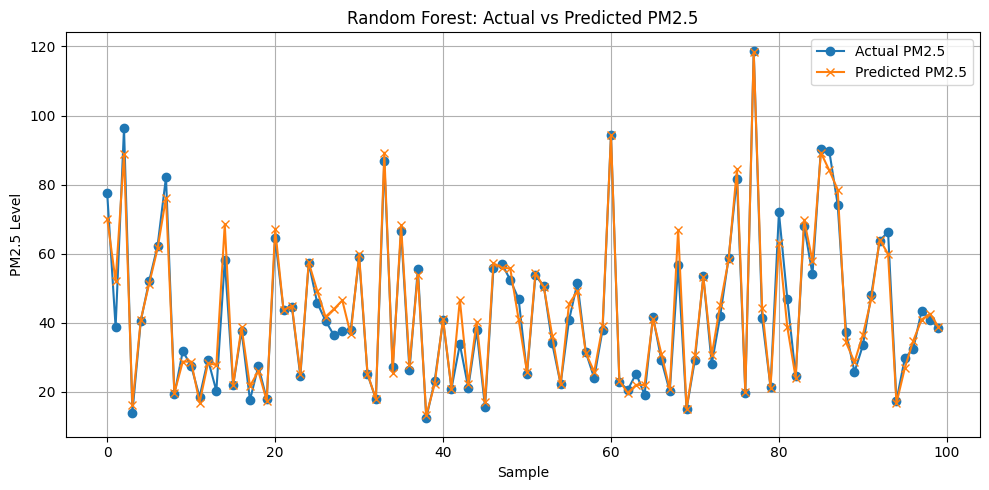

In [23]:
# Plot actual vs predicted for Random Forest
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual PM2.5', marker='o')
plt.plot(rf_preds[:100], label='Predicted PM2.5', marker='x')
plt.title('Random Forest: Actual vs Predicted PM2.5')
plt.xlabel('Sample')
plt.ylabel('PM2.5 Level')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
# Custom input: [Year, Month, Day, Hour]
custom_time = np.array([[2025, 1, 15, 18]])  # Jan 15, 2025 at 6PM
custom_scaled = scaler.transform(custom_time)

# Predict PM2.5
predicted_pm25 = rf.predict(custom_scaled)
print(f"Predicted PM2.5: {predicted_pm25[0]:.2f}")


Predicted PM2.5: 61.29


In [25]:
def get_aqi_category(pm25):
    if pm25 <= 30:
        return "Good"
    elif pm25 <= 60:
        return "Satisfactory"
    elif pm25 <= 90:
        return "Moderate"
    elif pm25 <= 120:
        return "Poor"
    elif pm25 <= 250:
        return "Very Poor"
    else:
        return "Severe"

category = get_aqi_category(predicted_pm25[0])
print(f"Predicted PM2.5: {predicted_pm25[0]:.2f} → AQI Category: {category}")


Predicted PM2.5: 61.29 → AQI Category: Moderate
